Dataset link -> https://www.kaggle.com/johnsmith88/heart-disease-dataset

**This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.**

# Content
# Attribute Information:

age

sex (1 = male; 0 = female)

chest pain type (4 values) (0,1,2,3)

resting blood pressure (float)

serum cholestoral in mg/dl (float)

fasting blood sugar > 120 mg/dl (1 = yes, 0=no)

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved (integer)

exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest (float)

the slope of the peak exercise ST segment (integer)

number of major vessels (0-3) colored by flourosopy (integer)

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.shape

(1025, 14)

In [7]:
# checking dataset is balanced or not
target_true_count = len(df.loc[df['target'] == 1])
target_false_count = len(df.loc[df['target'] == 0])

In [8]:
target_true_count, target_false_count

(526, 499)

<AxesSubplot:xlabel='target', ylabel='count'>

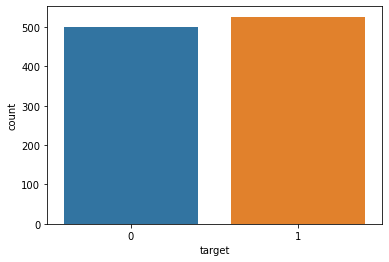

In [9]:
# plotting graph for output classes counts
sns.countplot(x = 'target',data = df)

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

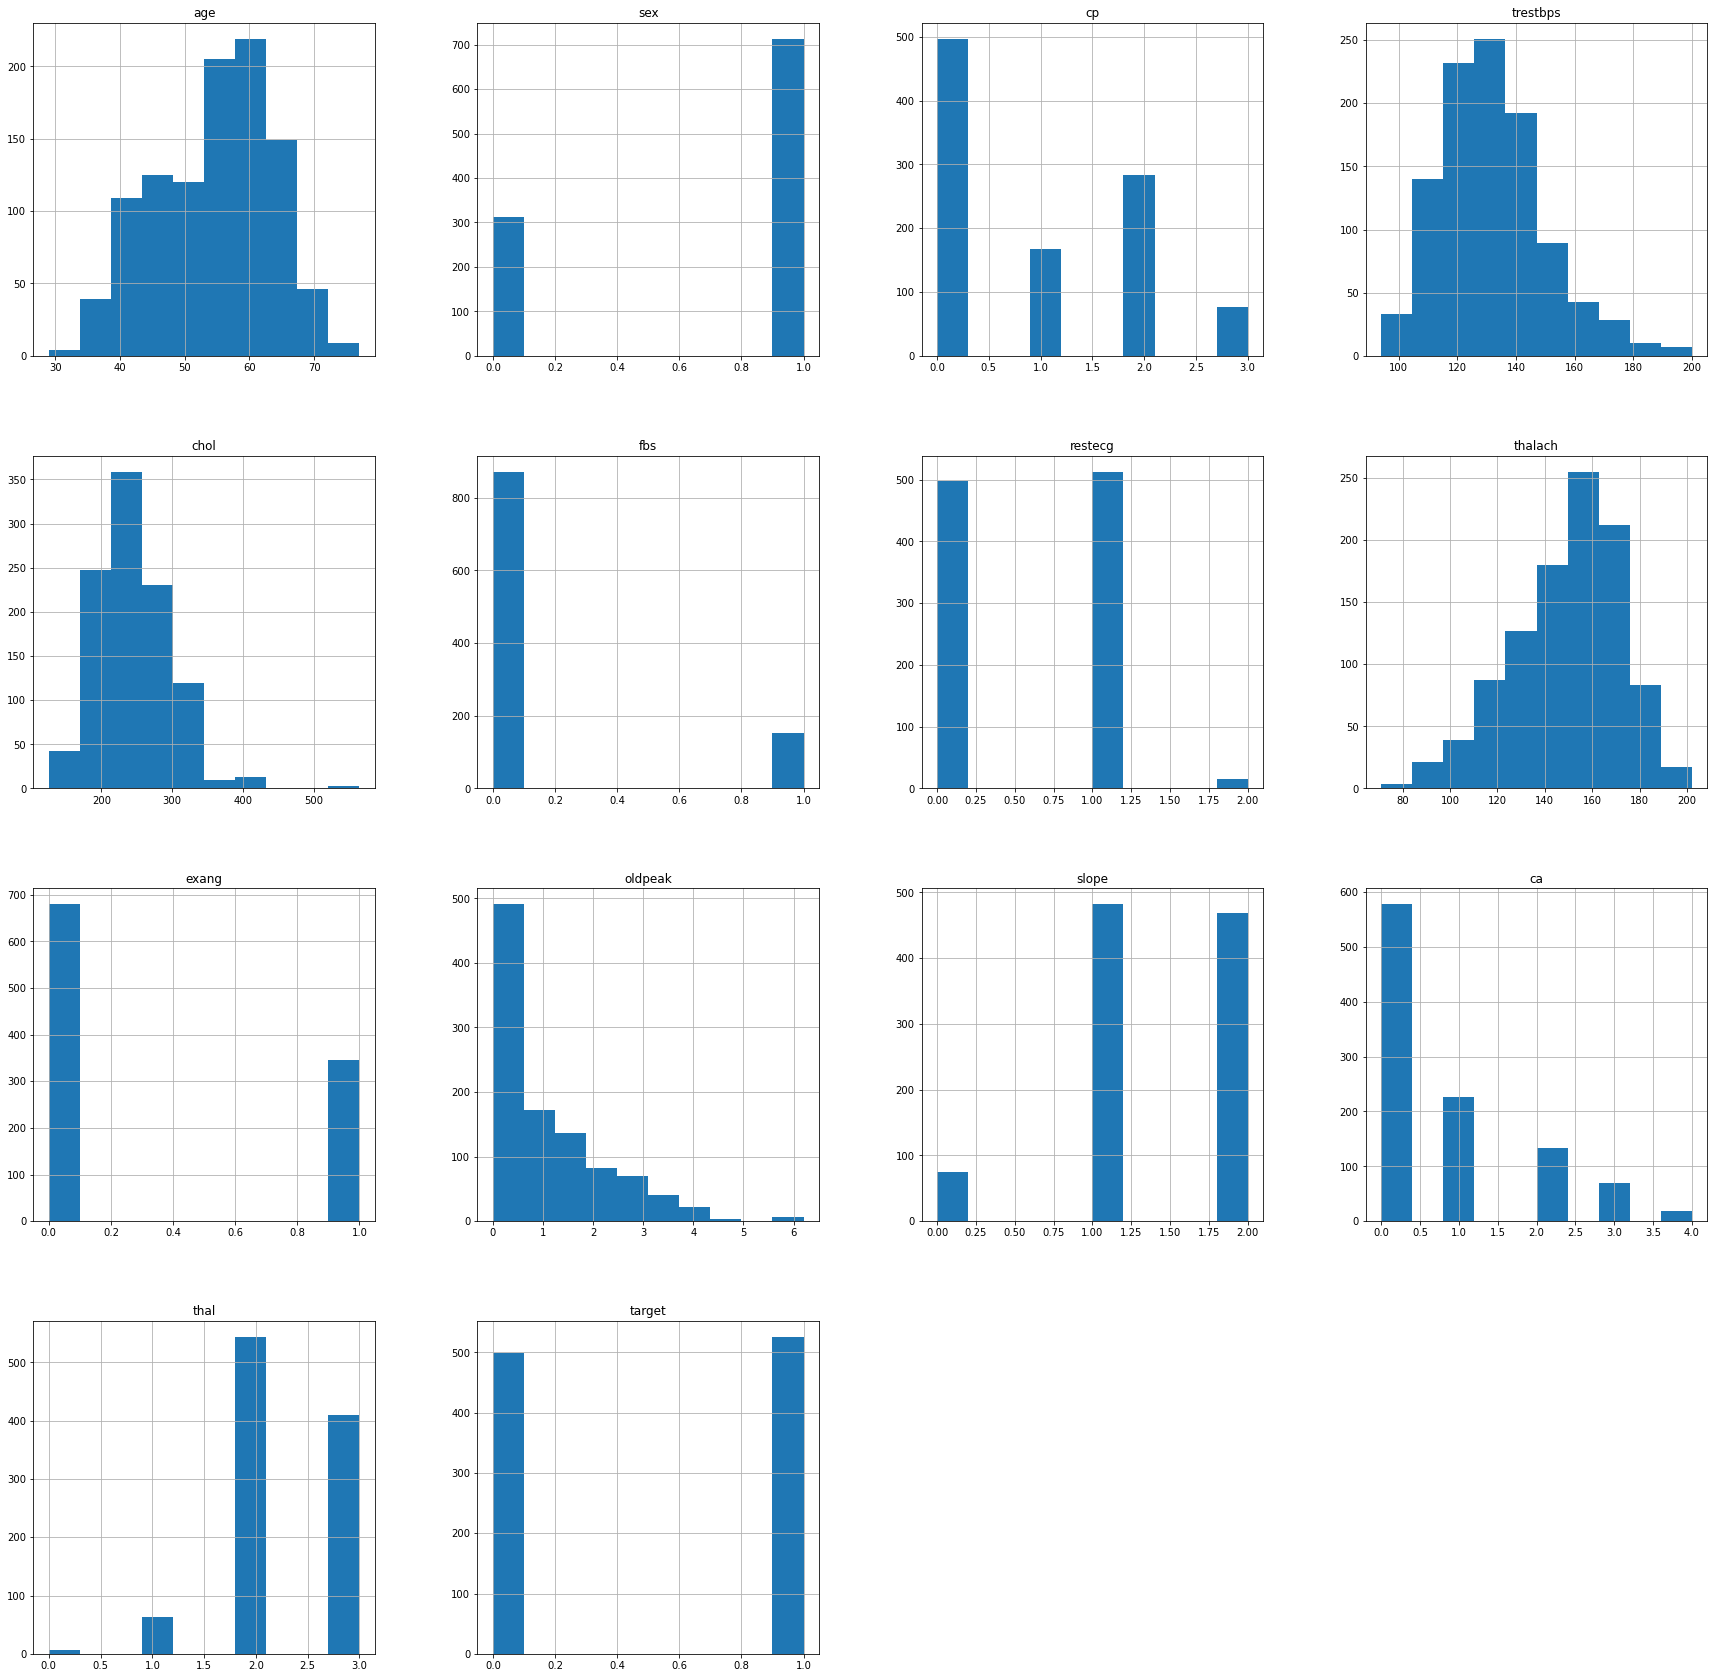

In [11]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


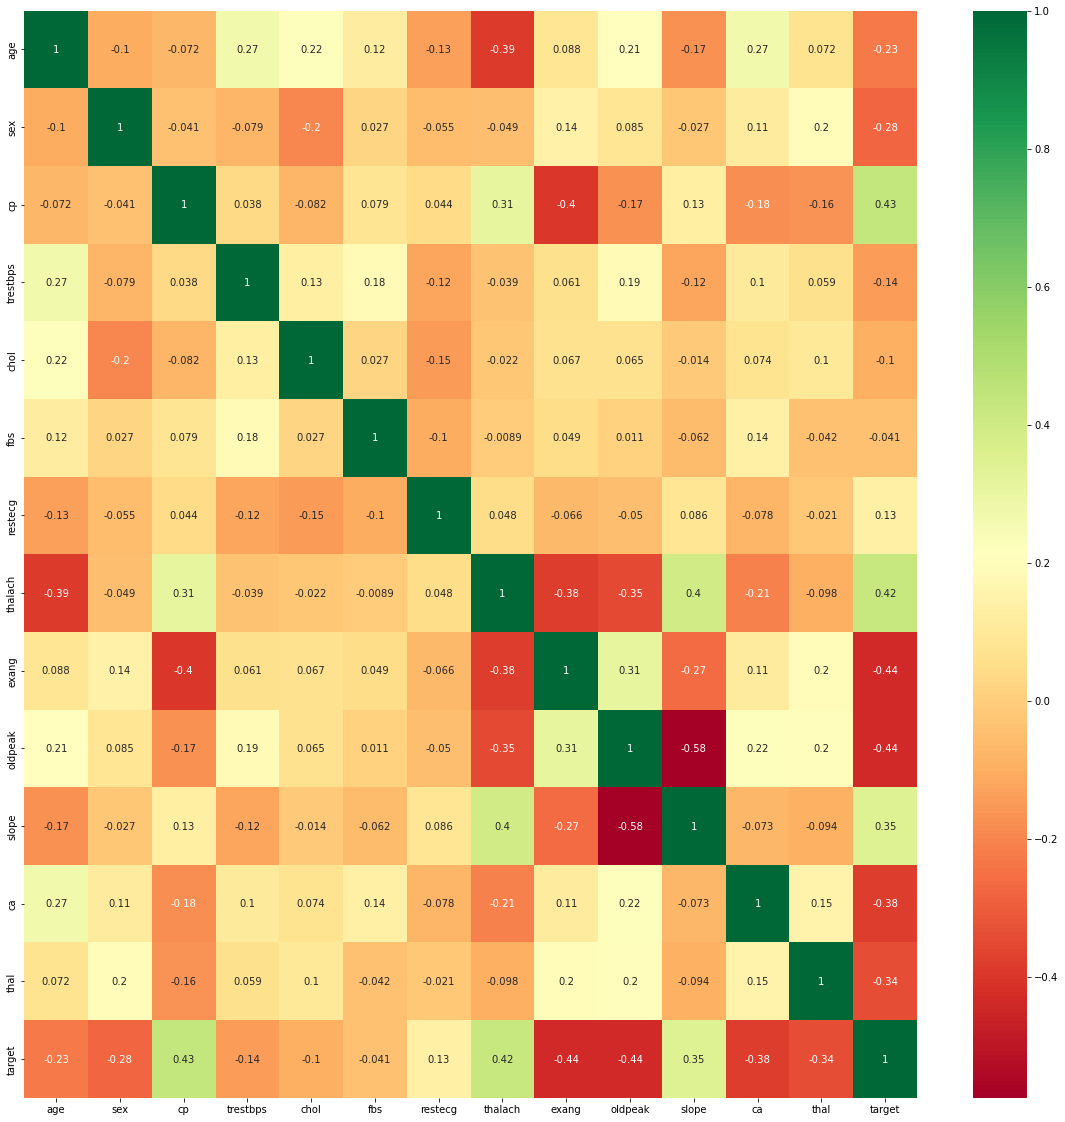

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### Checking if data has 0 values present

In [15]:
print("Age: {0}".format(len(df.loc[df['age'] == 0])))
print("gender: {0}".format(len(df.loc[df['sex'] == 0])))
print("chest pain type: {0}".format(len(df.loc[df['cp'] == 0])))
print("resting blood pressure: {0}".format(len(df.loc[df['trestbps'] == 0])))
print("serum cholestoral: {0}".format(len(df.loc[df['chol'] == 0])))
print("fasting blood sugar: {0}".format(len(df.loc[df['fbs'] == 0])))
print("resting electrocardiographic results: {0}".format(len(df.loc[df['restecg'] == 0])))
print("maximum heart rate achieved: {0}".format(len(df.loc[df['thalach'] == 0])))
print("exercise induced angina: {0}".format(len(df.loc[df['exang'] == 0])))
print("oldpeak : {0}".format(len(df.loc[df['oldpeak'] == 0])))
print("the slope of the peak exercise ST segment: {0}".format(len(df.loc[df['slope'] == 0])))
print("number of major vessels (0-3) colored by flourosopy: {0}".format(len(df.loc[df['ca'] == 0])))
print("thal: {0}".format(len(df.loc[df['thal'] == 0])))

Age: 0
gender: 312
chest pain type: 497
resting blood pressure: 0
serum cholestoral: 0
fasting blood sugar: 872
resting electrocardiographic results: 497
maximum heart rate achieved: 0
exercise induced angina: 680
oldpeak : 329
the slope of the peak exercise ST segment: 74
number of major vessels (0-3) colored by flourosopy: 578
thal: 7


##### preparing the data

In [16]:
from sklearn.model_selection import train_test_split
feature_columns = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang' , 'oldpeak', 'slope', 'ca', 'thal']
predicted_class = ['target']

In [17]:
X = df[feature_columns]
y = df[predicted_class]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((717, 13), (717, 1), (308, 13), (308, 1))

##### filling in 0 values

In [19]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)

In [21]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.961


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[149,   4],
       [  8, 147]], dtype=int64)

In [23]:
# import joblib
# joblib.dump(model, "./random_forest_heart.joblib")

import pickle
filename = "heart_disease.pkl"
pickle.dump(model, open(filename, "wb"))

['./random_forest_heart.joblib']

In [24]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(random_state=42)

model_1 = xg_model.fit(X_train, y_train)

In [25]:
predict_train_data = model_1.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.951


In [26]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[149,   4],
       [ 11, 144]], dtype=int64)

In [27]:
# import pickle
# filename = "heart_disease.pkl"
# pickle.dump(model_1, open(filename, "wb"))